# LOGISTIC REGRESSION

# Problem Statement
An education company, X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. When these people browse the courses and fill up a form providing their email address or phone number, they are classified to be a lead.
Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. 

X Education needs us to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

## Reading and Understanding Data

In [1]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Inspect Data

In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Cleaning

In [6]:
# Looking at all the columns and rows
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [7]:
leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Handling the Categorical Variables having 'Select' values.

After looking at the data, we have found that a few columns have the value **'Select'** which means that the customer has not selected any option in those columns. Let us look at those columns and replace the 'Select' values with proper data.

**The columns having 'Select' values are:**
1. City
2. Specialization
3. How did you hear about X Education
4. Lead Profile

In [8]:
# Checking the count of unique values in the 'City' column
leads.City.value_counts(normalize=True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

> We can see that 28% of the values in the City column have value as 'Select', let us replace these values with **'NaN'**

In [9]:
# Replacing the 'Select' value in City with NaN
leads.loc[leads.City == 'Select', 'City'] = np.nan

In [10]:
leads.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [11]:
# Checking the count of unique values in the 'Specialization' column
leads.Specialization.value_counts(normalize = True)

Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Media and Advertising                0.026019
Travel and Tourism                   0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: Specialization, dtype: float64

We can see that 24% of the data in the column 'Specialization' has the value 'Select'. This column tells us about the industry domain in which the customer worked before. So we can replace the 'Select' values to **NaN**.

In [12]:
leads.loc[leads.Specialization == 'Select', 'Specialization'] = np.nan

In [13]:
leads.Specialization.value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [14]:
# Checking the count of unique values in the 'How did you hear about X Education' column
leads['How did you hear about X Education'].value_counts(normalize = True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

> We can see that 71% of the data in the column 'How did you hear about X Education' has the value 'Select'. Let's replace the 'Select' values to **NaN**.

In [15]:
leads.loc[leads['How did you hear about X Education'] == 'Select', 'How did you hear about X Education'] = np.nan

In [16]:
leads['How did you hear about X Education'].value_counts(normalize = True)

Online Search            0.406030
Word Of Mouth            0.174874
Student of SomeSchool    0.155779
Other                    0.093467
Multiple Sources         0.076382
Advertisements           0.035176
Social Media             0.033668
Email                    0.013065
SMS                      0.011558
Name: How did you hear about X Education, dtype: float64

In [17]:
# Checking the count of unique values in the 'Lead Profile' column
leads['Lead Profile'].value_counts(normalize = True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

> We can see that 63% of the data in the column 'How did you hear about X Education' has the value 'Select'. Let's replace the 'Select' values to **NaN**.

In [18]:
leads.loc[leads['Lead Profile'] == 'Select', 'Lead Profile'] = np.nan

In [19]:
leads['Lead Profile'].value_counts(normalize = True)

Potential Lead                 0.676310
Other Leads                    0.204193
Student of SomeSchool          0.101048
Lateral Student                0.010063
Dual Specialization Student    0.008386
Name: Lead Profile, dtype: float64

### Null Values

In [20]:
# Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that, the columns **'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'** have more than 40% of null values, so let's drop these columns. 

In [21]:
# Dropping the columns with more than 40% of null values
leads = leads.drop(['How did you hear about X Education','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index', 
                    'Asymmetrique Activity Score', 'Asymmetrique Profile Score' ],axis = 1)

In [22]:
# Re-checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

We can see that the columns **'Lead Source', 'TotalVisits', 'Country', 'Specialization', 'Page Views Per Visit', 'Last Activity, 'Lead Profile', 'City', 'What is your current occupation', 'What matters most to you in choosing a course', 'City'** still have null values.

Before we handle these null values let's check for skewness in the categorical variables. 

### Skewness of Categories in Categorical Variables

In [23]:
# Identifying the Categorical Variables
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [24]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [25]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

We can see that the categories 'Lead Add Form', 'Lead Import' and 'Quick Add Form' have very less data as compared with other categories. Let's combine these categories to one Category - 'Others'

In [26]:
# Combine the categories 'Lead Add Form', 'Lead Import' and 'Quick Add Form' to 'Other'
leads.loc[leads['Lead Origin'] == 'Lead Add Form', 'Lead Origin'] = 'Others'
leads.loc[leads['Lead Origin'] == 'Lead Import', 'Lead Origin'] = 'Others'
leads.loc[leads['Lead Origin'] == 'Quick Add Form', 'Lead Origin'] = 'Others'

In [27]:
leads['Lead Origin'].value_counts(normalize = True)

Landing Page Submission    0.528788
API                        0.387446
Others                     0.083766
Name: Lead Origin, dtype: float64

In [28]:
# Checking for skewed data in 'Lead Origin'
leads['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
blog                 0.000109
testone              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
youtubechannel       0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
Name: Lead Source, dtype: float64

We can see that there are two levels belonging to the Category - 'Google'. Let us first combine the two.

In [29]:
leads.loc[leads['Lead Source'] == 'google', 'Lead Source'] = 'Google'

In [30]:
leads['Lead Source'].value_counts(normalize=True)

Google               0.312147
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
Click2call           0.000435
Social Media         0.000217
Press_Release        0.000217
Live Chat            0.000217
blog                 0.000109
testone              0.000109
Pay per Click Ads    0.000109
NC_EDM               0.000109
youtubechannel       0.000109
WeLearn              0.000109
welearnblog_Home     0.000109
Name: Lead Source, dtype: float64

> We can see that all the levels in this column except 'Google', 'Direct Traffic', 'Olark Chat' and 'Organic Search' have very less data, so lets combine these categories to 'Others'

In [31]:
# Combining categories with less data to Others
leads.loc[leads['Lead Source'] == 'Reference', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Welingak Website', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Referral Sites', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Facebook', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'bing', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Click2call', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Live Chat', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'WeLearn', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'welearnblog_Home', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'youtubechannel', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'testone', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Pay per Click Ads', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'blog', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Press_Release', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'testone', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'Social Media', 'Lead Source'] = 'Others'
leads.loc[leads['Lead Source'] == 'NC_EDM', 'Lead Source'] = 'Others'

In [32]:
leads['Lead Source'].value_counts(normalize=True)

Google            0.312147
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Others            0.095502
Name: Lead Source, dtype: float64

In [33]:
# Checking for skewness in the COUNTRY column
leads['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Canada                  0.000590
South Africa            0.000590
Germany                 0.000590
Nigeria                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Uganda                  0.000295
Italy                   0.000295
China                   0.000295
Netherlands             0.000295
Philippines             0.000295
Ghana                   0.000295
Asia/Pacific Region     0.000295
Belgium                 0.000295
Bangladesh              0.000295
Sri Lanka               0.000148
Liberia                 0.000148
Kenya     

We can see that the data is highly skewed in the Country column as 95% of the values belong to 'India', let us drop this column as using this column to build the model would wrongly influence results. 

In [34]:
leads = leads.drop(['Country'], axis = 1)

In [35]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [36]:
# Checking for categorical variables again
leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         3
Lead Source                                         5
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     18
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [37]:
# Checking for skewness in the 'Last Activity' column
leads['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [38]:
leads['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
View in browser link Clicked    0.000108
Email Received                  0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Name: Last Notable Activity, dtype: float64

In [39]:
# Removing the column due to data imbalance.
leads = leads.drop(['Last Activity'], axis = 1)

In [40]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [41]:
# Checking for skewness in the 'Specialization' column
leads['Specialization'].value_counts(normalize = True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

>No significant skewness found.

In [42]:
# Checking for skewness in the 'What is your current occupation' column
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

1. We can see that the data is highly skewed.
2. Lets replace the categories Student, Housewife and Businessman to 'Other' as it has very less data.

In [43]:
# Combining categories with less data to 'Other'
leads.loc[leads['What is your current occupation'] == 'Student', 'What is your current occupation'] = 'Other'
leads.loc[leads['What is your current occupation'] == 'Housewife', 'What is your current occupation'] = 'Other'
leads.loc[leads['What is your current occupation'] == 'Businessman', 'What is your current occupation'] = 'Other'

In [44]:
leads['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.854962
Working Professional    0.107786
Other                   0.037252
Name: What is your current occupation, dtype: float64

In [45]:
# Checking for skewness in the 'What matters most to you in choosing a course' column
leads['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

> **We can see that the data here is highly skewed. We can drop this column.**

In [46]:
leads = leads.drop(['What matters most to you in choosing a course'], axis = 1)

In [47]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9204 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9103 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9103 non-null   float64
 10  Specialization                      

In [48]:
# Checking skewness in City column
leads['City'].value_counts(normalize = True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

> We can see that the level 'Other Cities of Maharashtra' and 'Thane & Outskirts' are similar. Let's replace the level 'Thane & Outskirts' to 'Other Cities of Maharashtra'

In [49]:
# Renaming the level
leads.loc[leads['City'] == 'Thane & Outskirts', 'City'] = 'Other Cities of Maharashtra'

> Lets combine the levels 'Other Metro Cities and Tier II Cities to 'Other Cities', as they have very less data.

In [50]:
leads.loc[leads['City'] == 'Other Metro Cities', 'City'] = 'Other Cities'
leads.loc[leads['City'] == 'Tier II Cities', 'City'] = 'Other Cities'

In [51]:
leads['City'].value_counts(normalize=True)

Mumbai                         0.578352
Other Cities of Maharashtra    0.217017
Other Cities                   0.204631
Name: City, dtype: float64

In [52]:
# Checking skewness in City column
leads['Last Notable Activity'].value_counts(normalize = True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
View in browser link Clicked    0.000108
Email Received                  0.000108
Approached upfront              0.000108
Form Submitted on Website       0.000108
Resubscribed to emails          0.000108
Name: Last Notable Activity, dtype: float64

> We can see that all the levels except 'Modified, Email Opened and SMS Sent' have very less data, so lets combine those levels to 'Other'

In [53]:
# Combining categories with less data to Others
leads.loc[leads['Last Notable Activity'] == 'Page Visited on Website', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Olark Chat Conversation', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Email Link Clicked', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Email Bounce', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Unsubscribed', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Unreachable', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Had a Phone Conversation', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Email Marked Spam', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Resubscribed to emails', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'View in browser link Clicked', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Approached upfront', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Email Received', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Email Bounced', 'Last Notable Activity'] = 'Others'
leads.loc[leads['Last Notable Activity'] == 'Form Submitted on Website', 'Last Notable Activity'] = 'Others'

In [54]:
leads['Last Notable Activity'].value_counts(normalize=True)

Modified        0.368723
Email Opened    0.305952
SMS Sent        0.235065
Others          0.090260
Name: Last Notable Activity, dtype: float64

### Checking for skewness in binary variables

In [55]:
leads['Do Not Email'].value_counts(normalize=True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [56]:
leads = leads.drop(['Do Not Email'], axis = 1)

In [57]:
leads['Do Not Call'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

In [58]:
leads = leads.drop(['Do Not Call'], axis = 1)

In [59]:
leads['Search'].value_counts(normalize=True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [60]:
leads = leads.drop(['Search'], axis = 1)

In [61]:
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [62]:
leads = leads.drop(['Magazine'], axis = 1)

In [63]:
leads['Newspaper Article'].value_counts(normalize=True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [64]:
leads = leads.drop(['Newspaper Article'], axis = 1)

In [65]:
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [66]:
leads = leads.drop(['X Education Forums'], axis = 1)

In [67]:
leads['Digital Advertisement'].value_counts(normalize = True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [68]:
leads = leads.drop(['Digital Advertisement'], axis = 1)

In [69]:
leads['Newspaper'].value_counts(normalize=True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [70]:
leads = leads.drop(['Newspaper'], axis =1)

In [71]:
leads['Through Recommendations'].value_counts(normalize=True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [72]:
leads = leads.drop(['Through Recommendations'], axis = 1)

In [73]:
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [74]:
leads = leads.drop(['Receive More Updates About Our Courses'], axis = 1)

> As we can see the binary variables **Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital, Advertisement, Through Recommendations, Receive More Updates About Our Courses** have been dropped as these variables were highly skewed.

In [75]:
# Dropping variables with just one category as it would influence the data.
leads = leads.drop(['Update me on Supply Chain Content','Get updates on DM Content',
                    'I agree to pay the amount through cheque'], axis = 1)

In [76]:
# Checking for skewness in 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64

> No skewed data in the column A free copy of Mastering The Interview.

### Re-checking the Null Values

In [77]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

We can see that the columns **Specialization, What is your current occupation, City** have more than 10% of null values.

In [78]:
# Checking the data of column - What is your current occupation, to impute appropriate null values.
leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Other                   0.037252
Name: What is your current occupation, dtype: float64

In [79]:
leads['What is your current occupation'].describe()

count           6550
unique             3
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

We can clearly see that most of the values in this column are 'Unemployed', hence we can impute null values in this data to 'Unemployed' based on Mode Imputation.

In [80]:
# Imputing the null values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(to_replace = np.nan, value = 'Unemployed')

In [81]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                            36.58
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

#### Imputing missing values in the column - Specialization
> There are chances that the customer might have not chosen the Specialization because his/her specialization is not mentioned in the categories or because the customer is fresher. So, we can impute the null values to 'Other'.

In [82]:
# Imputing the null values
leads['Specialization'] = leads['Specialization'].replace(to_replace = np.nan, value = 'Other')

In [83]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Specialization                             0.00
What is your current occupation            0.00
City                                      39.71
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [84]:
# Checking the data of column - What is your current occupation, to impute appropriate null values.
leads['City'].value_counts(normalize=True)

Mumbai                         0.578352
Other Cities of Maharashtra    0.217017
Other Cities                   0.204631
Name: City, dtype: float64

In [85]:
leads['City'].describe()

count       5571
unique         3
top       Mumbai
freq        3222
Name: City, dtype: object

> We can clearly see that most of the values in this column are 'Mumbai', hence we can impute null values in this data to 'Mumbai' based on Mode Imputation.

In [86]:
# Imputing the null values
leads['City'] = leads['City'].replace(to_replace = np.nan, value = 'Mumbai')

In [87]:
# Re-Checking for null values in columns
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                               0.00
Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Specialization                            0.00
What is your current occupation           0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

Now, the null values in the data are below 10%, so we can drop these null values.

In [88]:
# Dropping the null values from the columns having less than 10% of null values.
leads = leads.dropna(subset = ['TotalVisits','Page Views Per Visit','Lead Source'])
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Other,Unemployed,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Other,Unemployed,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Business Administration,Other,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other,Unemployed,Mumbai,No,Modified


In [89]:
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### Dropping unneccessary columns

In [90]:
#Dropping the column 'Prospect ID' as it has no readable values.
leads = leads.drop(['Prospect ID'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Specialization                          9074 non-null   object 
 8   What is your current occupation         9074 non-null   object 
 9   City                                    9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   obje

In [91]:
#Dropping the column 'Total Time Spent on Website' as we cannot peform Logistic Regression on Time Series Data.
leads = leads.drop(['Total Time Spent on Website'], axis = 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Page Views Per Visit                    9074 non-null   float64
 6   Specialization                          9074 non-null   object 
 7   What is your current occupation         9074 non-null   object 
 8   City                                    9074 non-null   object 
 9   A free copy of Mastering The Interview  9074 non-null   object 
 10  Last Notable Activity                   9074 non-null   obje

In [92]:
# Dropping the column 'A free copy of Mastering The Interview' as it will not have any influence on Lead Conversion.
leads = leads.drop(['A free copy of Mastering The Interview'], axis = 1)

In [93]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Other,Unemployed,Mumbai,Modified
1,660728,API,Organic Search,0,5.0,2.5,Other,Unemployed,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Other,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Other,Unemployed,Mumbai,Modified


### Checking the number of retained rows, after DATA CLEANING

In [94]:
retained = len(leads.index)
print(retained)

9074


In [95]:
retainedp = round(100*(retained/9240),2)
print(retainedp)

98.2


In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Number                      9074 non-null   int64  
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Page Views Per Visit             9074 non-null   float64
 6   Specialization                   9074 non-null   object 
 7   What is your current occupation  9074 non-null   object 
 8   City                             9074 non-null   object 
 9   Last Notable Activity            9074 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 779.8+ KB


## EDA

### Outlier Analysis

In [97]:
# Checking for continuous variables in the data
leads.nunique()

Lead Number                        9074
Lead Origin                           3
Lead Source                           5
Converted                             2
TotalVisits                          41
Page Views Per Visit                114
Specialization                       19
What is your current occupation       3
City                                  3
Last Notable Activity                 4
dtype: int64

**The continuous variables are:**
1. TotalVisits
2. Page Views Per Visit                          

In [98]:
# Checking for outliers
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.head()

,TotalVisits,Page Views Per Visit
0,0.0,0.0
1,5.0,2.5
2,2.0,2.0
3,1.0,1.0
4,2.0,1.0


In [99]:
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.456028,2.370151
std,4.858802,2.160871
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
max,251.000000,55.000000


We can see from the statistical table that there are outliers in the data.

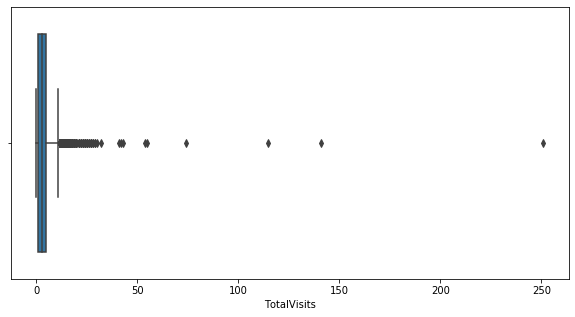

In [100]:
# Visualizing Outliers for 'TotalVisits'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['TotalVisits'])
plt.show()

In [101]:
# Checking the outliers at quantile level.
print(leads['TotalVisits'].quantile([.90,.95,.96,.97,.98,.99,1]))

0.90      7.0
0.95     10.0
0.96     10.0
0.97     11.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [102]:
# Capping outliers in exports
leads.loc[leads.TotalVisits>leads.TotalVisits.quantile(.99),"TotalVisits"] = leads.TotalVisits.quantile(.99)

In [103]:
print(leads['TotalVisits'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75     5.0
0.85     6.0
0.95    10.0
0.97    11.0
0.98    13.0
0.99    17.0
1.00    17.0
Name: TotalVisits, dtype: float64


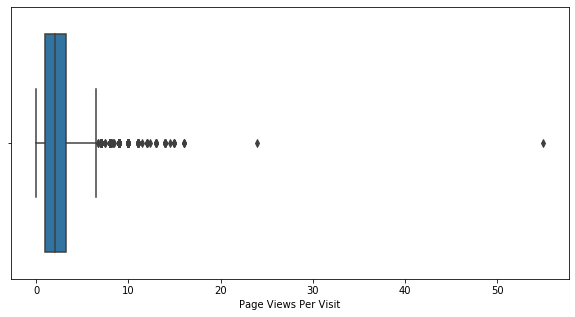

In [104]:
# Visualizing Outliers for 'Page Views Per Visit'
plt.figure(figsize = (10, 5))
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [105]:
# Checking the outliers at quantile level.
print(leads['Page Views Per Visit'].quantile([.75,.85,.90,.95,.96,.97,.98,.99,1]))

0.75     3.2
0.85     4.0
0.90     5.0
0.95     6.0
0.96     6.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64


> We can see that there is lot of difference between the 99th quantile and the 100th quantile. Let's cap the values at the 99th quantile.

In [106]:
# Capping outliers in exports
leads.loc[leads['Page Views Per Visit'] > 
          leads['Page Views Per Visit'].quantile(.99),"Page Views Per Visit"] = leads['Page Views Per Visit'].quantile(.99)

In [107]:
print(leads['Page Views Per Visit'].quantile([.75,.85,.95,.97,.98,.99,1]))

0.75    3.2
0.85    4.0
0.95    6.0
0.97    7.0
0.98    8.0
0.99    9.0
1.00    9.0
Name: Page Views Per Visit, dtype: float64


In [108]:
num_leads = leads[['TotalVisits','Page Views Per Visit']]
num_leads.describe()

,TotalVisits,Page Views Per Visit
count,9074.000000,9074.000000
mean,3.343178,2.341241
std,3.252302,1.984635
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.200000
max,17.000000,9.000000


**Outliers have been treated.**

## Data Preparation

In [109]:
leads.nunique()

Lead Number                        9074
Lead Origin                           3
Lead Source                           5
Converted                             2
TotalVisits                          18
Page Views Per Visit                102
Specialization                       19
What is your current occupation       3
City                                  3
Last Notable Activity                 4
dtype: int64

In [110]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0.0,Other,Unemployed,Mumbai,Modified
1,660728,API,Organic Search,0,5.0,2.5,Other,Unemployed,Mumbai,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Other,Mumbai,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,Modified
4,660681,Landing Page Submission,Google,1,2.0,1.0,Other,Unemployed,Mumbai,Modified


In [111]:
# Making a copy of the original data, before creating the dummy variables.
leads_final = leads.copy()

### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [112]:
# Creating dummy variables for categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation',
                               'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

# Creating dummy variable for the column 'City' and 
 # dropping the level 'Other Cities & Maharashtra', to avoid big names.
cl = pd.get_dummies(leads['City'], prefix='City')

# Dropping City_Other Cities of Maharashtra column
cl1 = cl.drop(['City_Other Cities of Maharashtra'], 1)

#Adding the results to the master dataframe
leads = pd.concat([leads,cl1], axis=1)

In [113]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent,City_Mumbai,City_Other Cities
0,660737,API,Olark Chat,0,0.0,0.0,Other,Unemployed,Mumbai,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Other,Unemployed,Mumbai,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Other,Mumbai,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Other,Unemployed,Mumbai,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [114]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9074 non-null   int64  
 1   Lead Origin                                           9074 non-null   object 
 2   Lead Source                                           9074 non-null   object 
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Page Views Per Visit                                  9074 non-null   float64
 6   Specialization                                        9074 non-null   object 
 7   What is your current occupation                       9074 non-null   object 
 8   City                                                  9074

In [115]:
#Renaming columns appropriately 
leads = leads.rename(columns = {'Lead Origin_Landing Page Submission' : 'Origin_Landing Page Submission',
                                'Lead Origin_Others' : 'Origin_Others',
                                'Lead Source_Google' : 'Source_Google', 'Lead Source_Olark Chat':'Source_Olark Chat',
                                'Lead Source_Organic Search':'Source_Organic Search',
                                'Lead Source_Others':'Source_Others',
                                'What is your current occupation_Unemployed':'Unemployed',
                                'What is your current occupation_Working Professional':'Working Professional',
                                'City_Other Cities' : 'Other Cities','City_Mumbai':'Mumbai',
                                'Last Notable Activity_SMS Sent':'Last Activity_SMS Sent',
                                'Last Notable Activity_Modified':'Last Activity_Modified',
                                'Last Notable Activity_Others':'Last Activity_Other'})

In [116]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Page Views Per Visit,Specialization,What is your current occupation,City,Last Notable Activity,Origin_Landing Page Submission,Origin_Others,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent,Mumbai,Other Cities
0,660737,API,Olark Chat,0,0.0,0.0,Other,Unemployed,Mumbai,Modified,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,660728,API,Organic Search,0,5.0,2.5,Other,Unemployed,Mumbai,Email Opened,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,2.0,Business Administration,Other,Mumbai,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,1.0,Media and Advertising,Unemployed,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,660681,Landing Page Submission,Google,1,2.0,1.0,Other,Unemployed,Mumbai,Modified,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [117]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Page Views Per Visit', 'Specialization',
       'What is your current occupation', 'City', 'Last Notable Activity',
       'Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Source_Olark Chat', 'Source_Organic Search', 'Source_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Other',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
   

In [118]:
# Dropping original column
leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization',
                    'What is your current occupation', 'City','Last Notable Activity'], axis = 1)

In [119]:
leads.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,Origin_Landing Page Submission,Origin_Others,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent,Mumbai,Other Cities
0,660737,0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,660728,0,5.0,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,660727,1,2.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,660719,0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,660681,1,2.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [120]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Number                               9074 non-null   int64  
 1   Converted                                 9074 non-null   int64  
 2   TotalVisits                               9074 non-null   float64
 3   Page Views Per Visit                      9074 non-null   float64
 4   Origin_Landing Page Submission            9074 non-null   uint8  
 5   Origin_Others                             9074 non-null   uint8  
 6   Source_Google                             9074 non-null   uint8  
 7   Source_Olark Chat                         9074 non-null   uint8  
 8   Source_Organic Search                     9074 non-null   uint8  
 9   Source_Others                             9074 non-null   uint8  
 10  Specialization_Business Administrati

## Train-Test Split

In [121]:
# Importing the required Library
from sklearn.model_selection import train_test_split

In [122]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)
X.head()

,TotalVisits,Page Views Per Visit,Origin_Landing Page Submission,Origin_Others,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent,Mumbai,Other Cities
0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
1,5.0,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2,2.0,2.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
4,2.0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [123]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [124]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
scaler = StandardScaler()

X_train[['TotalVisits']] = scaler.fit_transform(X_train[['TotalVisits']])
X_train.head()


,TotalVisits,Page Views Per Visit,Origin_Landing Page Submission,Origin_Others,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent,Mumbai,Other Cities
3009,-0.417238,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1012,-0.417238,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
9226,-1.034493,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4750,-0.417238,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
7987,0.508645,2.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


## Model Building

In [127]:
# Importing the required library
import statsmodels.api as sm

In [128]:
# Running the first training model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3136.8
Date:                Mon, 20 Jul 2020   Deviance:                       6273.6
Time:                        01:33:42   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        1.0046      0.283      3.548      0.000       0.450       1.560
TotalVisits                                  0.2837      0.043      6.573      0.000       0.199       0.368
Page Views Per Visit                        -0.0958      0.025     -3.830      0.000      -0.145      -0.047
Origin_Landing Page Submission              -1.0911      0.121     -9.042      0.000      -1.328      -0.855
Origin_Others                                2.6875      0.322      8.337      0.000       2.056       3.319
Source_Google                                0.4006      0.085      4.699      0.000       0.233       0.568
Source_Olark Chat                            0.0702      0.132      0.534      0.594      -0.188       0.328
Source_Organic Search                        0.1236      0.115      1.077      0.282      -0.101       0.349
Source_Others                               -0.0510      0.276     -0.185      0.854      -0.593       0.491
Specialization_Business Administration      -0.2581      0.217     -1.189      0.234      -0.683       0.167
Specialization_E-Business                    0.2845      0.393      0.724      0.469      -0.486       1.055
Specialization_E-COMMERCE                   -0.5674      0.328     -1.729      0.084      -1.211       0.076
Specialization_Finance Management           -0.1775      0.182     -0.975      0.329      -0.534       0.179
Specialization_Healthcare Management        -0.2495      0.283     -0.880      0.379      -0.805       0.306
Specialization_Hospitality Management       -0.3472      0.326     -1.063      0.288      -0.987       0.293
Specialization_Human Resource Management    -0.1200      0.185     -0.649      0.517      -0.483       0.243
Specialization_IT Projects Management       -0.3099      0.219     -1.415      0.157      -0.739       0.119
Specialization_International Business       -0.4118      0.263     -1.567      0.117      -0.927       0.103
Specialization_Marketing Management         -0.0255      0.185     -0.138      0.890      -0.389       0.337
Specialization_Media and Advertising        -0.4159      0.253     -1.646      0.100      -0.911       0.079
Specialization_Operations Management        -0.1267      0.204     -0.622      0.534      -0.526       0.273
Specialization_Other                        -1.4673      0.190     -7.706      0.000      -1.840      -1.094
Specialization_Retail Management            -0.4072      0.320     -1.271      0.204      -1.035       0.221
Specialization_Rural and Agribusiness       -0.2496      0.361     -0.691      0.489      -0.957       0.458
Specialization_Services Excellence          -1.0106      0.571     -1.770      0.077      -2.130       0.109
Specialization_Supply Chain Man

## Feature Selecting using RFE

In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [130]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [131]:
rfe.support_

array([False, False,  True,  True,  True, False, False, False, False,
        True,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True, False, False])

In [132]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Page Views Per Visit', False, 10),
 ('Origin_Landing Page Submission', True, 1),
 ('Origin_Others', True, 1),
 ('Source_Google', True, 1),
 ('Source_Olark Chat', False, 15),
 ('Source_Organic Search', False, 9),
 ('Source_Others', False, 14),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_E-Business', True, 1),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 16),
 ('Specialization_Healthcare Management', False, 7),
 ('Specialization_Hospitality Management', False, 4),
 ('Specialization_Human Resource Management', False, 19),
 ('Specialization_IT Projects Management', False, 3),
 ('Specialization_International Business', True, 1),
 ('Specialization_Marketing Management', False, 6),
 ('Specialization_Media and Advertising', True, 1),
 ('Specialization_Operations Management', False, 18),
 ('Specialization_Other', True, 1),
 ('Specialization_Retail Management', True, 1),
 ('Specialization_Rural 

In [133]:
col = X_train.columns[rfe.support_]

In [134]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Source_Olark Chat',
       'Source_Organic Search', 'Source_Others',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Mumbai', 'Other Cities'],
      dtype='object')

In [135]:
# Assessing the model with statsmodel
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3163.4
Date:                Mon, 20 Jul 2020   Deviance:                       6326.8
Time:                        01:33:44   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6652      0.210      3.170      0.002       0.254       1.076
Origin_Landing Page Submission           -1.1596      0.109    -10.610      0.000      -1.374      -0.945
Origin_Others                             2.5147      0.180     13.987      0.000       2.162       2.867
Source_Google                             0.3672      0.066      5.604      0.000       0.239       0.496
Specialization_E-Business                 0.3822      0.362      1.057      0.291      -0.327       1.091
Specialization_E-COMMERCE                -0.4100      0.290     -1.416      0.157      -0.978       0.158
Specialization_International Business    -0.2578      0.214     -1.204      0.228      -0.677       0.162
Specialization_Media and Advertising     -0.2335      0.202     -1.157      0.247      -0.629       0.162
Specialization_Other                     -1.4042      0.113    -12.427      0.000      -1.626      -1.183
Specialization_Retail Management         -0.2269      0.280     -0.809      0.419      -0.777       0.323
Specialization_Services Excellence       -0.8784      0.548     -1.604      0.109      -1.952       0.195
Unemployed                               -0.5235      0.186     -2.813      0.005      -0.888      -0.159
Working Professional                      2.1468      0.254      8.451      0.000       1.649       2.645
Last Activity_Modified                   -0.7540      0.079     -9.563      0.000      -0.909      -0.599
Last Activity_Other                      -0.2920      0.116     -2.525      0.012      -0.519      -0.065
Last Activity_SMS Sent                    1.4183      0.080     17.779      0.000       1.262       1.575
=========================================================================================================
"""

In [136]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [137]:
y_train_pred[:10]

array([0.26542438, 0.48905138, 0.11748015, 0.59877221, 0.14529836,
       0.68298205, 0.34280821, 0.87293169, 0.22244128, 0.14529836])

##### Creating a dataframe with the actual 'converted' flag and the 'conversion' probabilities

In [139]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final.head(20)

,Converted,Converted_Prob,Lead ID
0,0,0.265424,3009
1,0,0.489051,1012
2,0,0.117480,9226
3,1,0.598772,4750
4,1,0.145298,7987
5,1,0.682982,1281
6,0,0.342808,2880
7,1,0.872932,4971
8,1,0.222441,7536
9,0,0.145298,1248


##### Creating new column 'predicted' with 1 if Coverted_Prob > 0.5 else 0

In [141]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.265424,3009,0
1,0,0.489051,1012,0
2,0,0.117480,9226,0
3,1,0.598772,4750,1
4,1,0.145298,7987,0


In [142]:
from sklearn import metrics

In [143]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3331  574]
 [ 882 1564]]


In [144]:
# Predicted     not_churn    churn
# Actual
# not_churn        2221      470
# churn            754       1331  

In [145]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7707447646039993


#### Checking VIFs 

In [147]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Specialization_International Business,1.04
6,Specialization_Media and Advertising,1.04
4,Specialization_E-COMMERCE,1.02
8,Specialization_Retail Management,1.02
3,Specialization_E-Business,1.01
9,Specialization_Services Excellence,1.01
11,Working Professional,0.74
1,Origin_Others,0.59
12,Last Activity_Modified,0.22
2,Source_Google,0.18


#### We can see that, even though the VIFs are normal, a few variables have a p-value > 0.05. Lets drop these variables one by one and recheck the statsmodel.

In [149]:
# dropping the variable - 'Specialization_Retail Management', as it has high p-value
col = col.drop('Specialization_Retail Management', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Media and Advertising', 'Specialization_Other',
       'Specialization_Services Excellence', 'Unemployed',
       'Working Professional', 'Last Activity_Modified', 'Last Activity_Other',
       'Last Activity_SMS Sent'],
      dtype='object')

In [150]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3163.7
Date:                Mon, 20 Jul 2020   Deviance:                       6327.5
Time:                        01:41:03   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6623      0.210      3.156      0.002       0.251       1.074
Origin_Landing Page Submission           -1.1619      0.109    -10.635      0.000      -1.376      -0.948
Origin_Others                             2.5138      0.180     13.982      0.000       2.161       2.866
Source_Google                             0.3667      0.066      5.598      0.000       0.238       0.495
Specialization_E-Business                 0.3874      0.362      1.071      0.284      -0.321       1.096
Specialization_E-COMMERCE                -0.4051      0.290     -1.399      0.162      -0.973       0.162
Specialization_International Business    -0.2529      0.214     -1.182      0.237      -0.672       0.166
Specialization_Media and Advertising     -0.2286      0.202     -1.132      0.257      -0.624       0.167
Specialization_Other                     -1.4011      0.113    -12.407      0.000      -1.622      -1.180
Specialization_Services Excellence       -0.8735      0.548     -1.595      0.111      -1.947       0.200
Unemployed                               -0.5230      0.186     -2.809      0.005      -0.888      -0.158
Working Professional                      2.1486      0.254      8.457      0.000       1.651       2.647
Last Activity_Modified                   -0.7545      0.079     -9.570      0.000      -0.909      -0.600
Last Activity_Other                      -0.2937      0.116     -2.540      0.011      -0.520      -0.067
Last Activity_SMS Sent                    1.4176      0.080     17.774      0.000       1.261       1.574
=========================================================================================================
"""

In [151]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [152]:
y_train_pred[:10]

array([0.26453166, 0.48856765, 0.1175077 , 0.59749552, 0.1446645 ,
       0.68173499, 0.34167684, 0.87254381, 0.22250545, 0.1446645 ])

In [153]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [154]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.264532,3009,0
1,0,0.488568,1012,0
2,0,0.117508,9226,0
3,1,0.597496,4750,1
4,1,0.144664,7987,0


In [155]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7707447646039993


Overall Accuracy is almost the same

#### Checking VIFs again

In [156]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Specialization_International Business,1.04
6,Specialization_Media and Advertising,1.04
4,Specialization_E-COMMERCE,1.02
3,Specialization_E-Business,1.01
8,Specialization_Services Excellence,1.01
10,Working Professional,0.74
1,Origin_Others,0.59
11,Last Activity_Modified,0.22
2,Source_Google,0.18
12,Last Activity_Other,0.14


In [157]:
# dropping the variable - 'Specialization_E-Business', as it has high p-value
col = col.drop('Specialization_E-Business', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising', 'Specialization_Other',
       'Specialization_Services Excellence', 'Unemployed',
       'Working Professional', 'Last Activity_Modified', 'Last Activity_Other',
       'Last Activity_SMS Sent'],
      dtype='object')

In [158]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3164.3
Date:                Mon, 20 Jul 2020   Deviance:                       6328.6
Time:                        01:41:24   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6642      0.210      3.166      0.002       0.253       1.075
Origin_Landing Page Submission           -1.1589      0.109    -10.613      0.000      -1.373      -0.945
Origin_Others                             2.5145      0.180     13.988      0.000       2.162       2.867
Source_Google                             0.3653      0.065      5.578      0.000       0.237       0.494
Specialization_E-COMMERCE                -0.4099      0.289     -1.416      0.157      -0.977       0.157
Specialization_International Business    -0.2573      0.214     -1.203      0.229      -0.676       0.162
Specialization_Media and Advertising     -0.2332      0.202     -1.156      0.248      -0.629       0.162
Specialization_Other                     -1.4036      0.113    -12.434      0.000      -1.625      -1.182
Specialization_Services Excellence       -0.8780      0.548     -1.603      0.109      -1.951       0.195
Unemployed                               -0.5230      0.186     -2.810      0.005      -0.888      -0.158
Working Professional                      2.1448      0.254      8.443      0.000       1.647       2.643
Last Activity_Modified                   -0.7523      0.079     -9.547      0.000      -0.907      -0.598
Last Activity_Other                      -0.2911      0.116     -2.518      0.012      -0.518      -0.065
Last Activity_SMS Sent                    1.4180      0.080     17.780      0.000       1.262       1.574
=========================================================================================================
"""

In [159]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [160]:
y_train_pred[:10]

array([0.26546468, 0.48883587, 0.11765781, 0.59874958, 0.14553225,
       0.68255869, 0.34243574, 0.87263696, 0.22253309, 0.14553225])

In [161]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [162]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.265465,3009,0
1,0,0.488836,1012,0
2,0,0.117658,9226,0
3,1,0.598750,4750,1
4,1,0.145532,7987,0


In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7707447646039993


Overall Accuracy is almost the same

#### Checking VIFs again

In [164]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_International Business,1.04
5,Specialization_Media and Advertising,1.04
3,Specialization_E-COMMERCE,1.02
7,Specialization_Services Excellence,1.01
9,Working Professional,0.74
1,Origin_Others,0.59
10,Last Activity_Modified,0.22
2,Source_Google,0.18
11,Last Activity_Other,0.14
8,Unemployed,0.13


In [165]:
# dropping the variable - 'Specialization_Media and Advertising', as it has high p-value
col = col.drop('Specialization_Media and Advertising', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Other', 'Specialization_Services Excellence',
       'Unemployed', 'Working Professional', 'Last Activity_Modified',
       'Last Activity_Other', 'Last Activity_SMS Sent'],
      dtype='object')

In [166]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3165.0
Date:                Mon, 20 Jul 2020   Deviance:                       6330.0
Time:                        01:42:01   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.6537      0.210      3.119      0.002       0.243       1.064
Origin_Landing Page Submission           -1.1578      0.109    -10.610      0.000      -1.372      -0.944
Origin_Others                             2.5162      0.180     14.001      0.000       2.164       2.868
Source_Google                             0.3662      0.065      5.593      0.000       0.238       0.495
Specialization_E-COMMERCE                -0.4001      0.289     -1.383      0.167      -0.967       0.167
Specialization_International Business    -0.2478      0.214     -1.160      0.246      -0.667       0.171
Specialization_Other                     -1.3933      0.112    -12.390      0.000      -1.614      -1.173
Specialization_Services Excellence       -0.8681      0.547     -1.586      0.113      -1.941       0.205
Unemployed                               -0.5218      0.186     -2.804      0.005      -0.887      -0.157
Working Professional                      2.1471      0.254      8.454      0.000       1.649       2.645
Last Activity_Modified                   -0.7533      0.079     -9.560      0.000      -0.908      -0.599
Last Activity_Other                      -0.2929      0.116     -2.535      0.011      -0.519      -0.066
Last Activity_SMS Sent                    1.4143      0.080     17.754      0.000       1.258       1.570
=========================================================================================================
"""

In [167]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [168]:
y_train_pred[:10]

array([0.26387778, 0.48920258, 0.11766686, 0.59589047, 0.14440461,
       0.68018131, 0.34081243, 0.87128588, 0.26387778, 0.14440461])

In [169]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [170]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.263878,3009,0
1,0,0.489203,1012,0
2,0,0.117667,9226,0
3,1,0.595890,4750,1
4,1,0.144405,7987,0


In [171]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7707447646039993


Overall Accuracy is almost the same

#### Checking VIFs again

In [172]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_International Business,1.03
3,Specialization_E-COMMERCE,1.02
6,Specialization_Services Excellence,1.01
8,Working Professional,0.74
1,Origin_Others,0.59
9,Last Activity_Modified,0.22
2,Source_Google,0.18
10,Last Activity_Other,0.14
7,Unemployed,0.13
0,Origin_Landing Page Submission,0.12


In [173]:
# dropping the variable - 'Specialization_International Business', as it has high p-value
col = col.drop('Specialization_International Business', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_E-COMMERCE', 'Specialization_Other',
       'Specialization_Services Excellence', 'Unemployed',
       'Working Professional', 'Last Activity_Modified', 'Last Activity_Other',
       'Last Activity_SMS Sent'],
      dtype='object')

In [174]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3165.7
Date:                Mon, 20 Jul 2020   Deviance:                       6331.3
Time:                        01:42:30   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6441      0.209      3.075      0.002       0.234       1.055
Origin_Landing Page Submission        -1.1575      0.109    -10.610      0.000      -1.371      -0.944
Origin_Others                          2.5172      0.180     14.009      0.000       2.165       2.869
Source_Google                          0.3662      0.065      5.593      0.000       0.238       0.494
Specialization_E-COMMERCE             -0.3917      0.289     -1.354      0.176      -0.958       0.175
Specialization_Other                  -1.3847      0.112    -12.344      0.000      -1.605      -1.165
Specialization_Services Excellence    -0.8603      0.548     -1.571      0.116      -1.933       0.213
Unemployed                            -0.5224      0.186     -2.806      0.005      -0.887      -0.158
Working Professional                   2.1516      0.254      8.473      0.000       1.654       2.649
Last Activity_Modified                -0.7503      0.079     -9.528      0.000      -0.905      -0.596
Last Activity_Other                   -0.2909      0.116     -2.516      0.012      -0.517      -0.064
Last Activity_SMS Sent                 1.4149      0.080     17.766      0.000       1.259       1.571
======================================================================================================
"""

In [175]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [176]:
y_train_pred[:10]

array([0.26196693, 0.49068477, 0.11782002, 0.59366768, 0.14355523,
       0.67815348, 0.33858196, 0.8702068 , 0.26196693, 0.14355523])

In [177]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [178]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.261967,3009,0
1,0,0.490685,1012,0
2,0,0.117820,9226,0
3,1,0.593668,4750,1
4,1,0.143555,7987,0


In [179]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7709022201228153


Overall Accuracy is almost the same

#### Checking VIFs again

In [180]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Specialization_E-COMMERCE,1.02
5,Specialization_Services Excellence,1.01
7,Working Professional,0.74
1,Origin_Others,0.59
8,Last Activity_Modified,0.22
2,Source_Google,0.18
9,Last Activity_Other,0.14
6,Unemployed,0.12
0,Origin_Landing Page Submission,0.11
10,Last Activity_SMS Sent,0.02


In [181]:
# dropping the variable - 'Specialization_E-COMMERCE', as it has high p-value
col = col.drop('Specialization_E-COMMERCE', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_Other', 'Specialization_Services Excellence',
       'Unemployed', 'Working Professional', 'Last Activity_Modified',
       'Last Activity_Other', 'Last Activity_SMS Sent'],
      dtype='object')

In [182]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.6
Date:                Mon, 20 Jul 2020   Deviance:                       6333.2
Time:                        01:42:56   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.6436      0.209      3.073      0.002       0.233       1.054
Origin_Landing Page Submission        -1.1590      0.109    -10.624      0.000      -1.373      -0.945
Origin_Others                          2.5165      0.180     14.006      0.000       2.164       2.869
Source_Google                          0.3684      0.065      5.630      0.000       0.240       0.497
Specialization_Other                  -1.3784      0.112    -12.299      0.000      -1.598      -1.159
Specialization_Services Excellence    -0.8521      0.547     -1.557      0.120      -1.925       0.221
Unemployed                            -0.5272      0.186     -2.833      0.005      -0.892      -0.162
Working Professional                   2.1457      0.254      8.454      0.000       1.648       2.643
Last Activity_Modified                -0.7525      0.079     -9.559      0.000      -0.907      -0.598
Last Activity_Other                   -0.2924      0.116     -2.530      0.011      -0.519      -0.066
Last Activity_SMS Sent                 1.4118      0.080     17.742      0.000       1.256       1.568
======================================================================================================
"""

In [183]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [184]:
y_train_pred[:10]

array([0.26064733, 0.48986766, 0.11768776, 0.59126834, 0.14244419,
       0.67647164, 0.33755387, 0.86950419, 0.26064733, 0.14244419])

In [185]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [186]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.260647,3009,0
1,0,0.489868,1012,0
2,0,0.117688,9226,0
3,1,0.591268,4750,1
4,1,0.142444,7987,0


In [187]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7709022201228153


Overall Accuracy is almost the same

#### Checking VIFs again

In [188]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Specialization_Services Excellence,1.01
6,Working Professional,0.74
1,Origin_Others,0.59
7,Last Activity_Modified,0.22
2,Source_Google,0.18
8,Last Activity_Other,0.14
5,Unemployed,0.12
0,Origin_Landing Page Submission,0.11
9,Last Activity_SMS Sent,0.02
3,Specialization_Other,0.00


In [189]:
# dropping the variable - 'Specialization_Services Excellence', as it has high p-value
col = col.drop('Specialization_Services Excellence', 1)
col

Index(['Origin_Landing Page Submission', 'Origin_Others', 'Source_Google',
       'Specialization_Other', 'Unemployed', 'Working Professional',
       'Last Activity_Modified', 'Last Activity_Other',
       'Last Activity_SMS Sent'],
      dtype='object')

In [190]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3167.9
Date:                Mon, 20 Jul 2020   Deviance:                       6335.8
Time:                        01:43:11   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.6420      0.209      3.067      0.002       0.232       1.052
Origin_Landing Page Submission    -1.1581      0.109    -10.618      0.000      -1.372      -0.944
Origin_Others                      2.5145      0.180     14.000      0.000       2.162       2.867
Source_Google                      0.3702      0.065      5.659      0.000       0.242       0.498
Specialization_Other              -1.3729      0.112    -12.258      0.000      -1.592      -1.153
Unemployed                        -0.5302      0.186     -2.850      0.004      -0.895      -0.166
Working Professional               2.1348      0.254      8.420      0.000       1.638       2.632
Last Activity_Modified            -0.7531      0.079     -9.569      0.000      -0.907      -0.599
Last Activity_Other               -0.2994      0.116     -2.592      0.010      -0.526      -0.073
Last Activity_SMS Sent             1.4099      0.080     17.726      0.000       1.254       1.566
==================================================================================================
"""

In [191]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [192]:
y_train_pred[:10]

array([0.25995853, 0.48662499, 0.11772578, 0.58994449, 0.14193257,
       0.67567297, 0.33716288, 0.86898559, 0.25995853, 0.14193257])

In [193]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [194]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted
0,0,0.259959,3009,0
1,0,0.486625,1012,0
2,0,0.117726,9226,0
3,1,0.589944,4750,1
4,1,0.141933,7987,0


In [195]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7707447646039993


Overall Accuracy is almost the same

#### Checking VIFs again

In [196]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Working Professional,0.74
1,Origin_Others,0.59
6,Last Activity_Modified,0.22
2,Source_Google,0.18
7,Last Activity_Other,0.14
4,Unemployed,0.12
0,Origin_Landing Page Submission,0.11
8,Last Activity_SMS Sent,0.02
3,Specialization_Other,0.00


We can see that the VIF values and p-values are low, we can say the variables in the model are significant enough.

In [197]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3318,  587],
       [ 869, 1577]])

In [198]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [199]:
# Let us calculate specificity
TN / float(TN+FP)

0.8496798975672215

In [200]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6447260834014718

### Plotting the ROC Curve

In [201]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [202]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

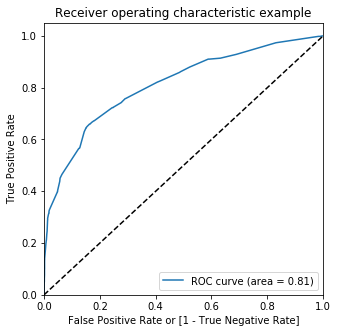

In [203]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

In [204]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.259959,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.486625,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.117726,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.589944,4750,1,1,1,1,1,1,1,0,0,0,0
4,1,0.141933,7987,0,1,1,0,0,0,0,0,0,0,0


In [205]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.394111  0.998365  0.015621
0.2   0.2  0.632814  0.879804  0.478105
0.3   0.3  0.741773  0.723630  0.753137
0.4   0.4  0.768225  0.659853  0.836108
0.5   0.5  0.770745  0.644726  0.849680
0.6   0.6  0.754684  0.465249  0.935980
0.7   0.7  0.729491  0.327882  0.981050
0.8   0.8  0.718312  0.289043  0.987196
0.9   0.9  0.690442  0.208095  0.992574


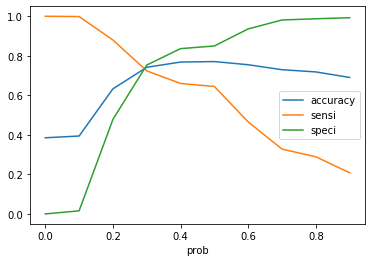

In [206]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [207]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.259959,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.486625,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.117726,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.589944,4750,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.141933,7987,0,1,1,0,0,0,0,0,0,0,0,0


In [208]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.730593607305936

In [209]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2819, 1086],
       [ 625, 1821]])

In [210]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [211]:
# Let us calculate specificity
TN / float(TN+FP)

0.7218950064020486

In [212]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7444807849550286

## Model Evaluation

### Precision and Recall

In [213]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3318,  587],
       [ 869, 1577]])

In [214]:
#Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7287430683918669

In [215]:
#Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6447260834014718

In [216]:
from sklearn.metrics import precision_score, recall_score


In [217]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7287430683918669

In [218]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6447260834014718

#### Precision-Recall Curve

In [219]:
from sklearn.metrics import precision_recall_curve

In [220]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [221]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

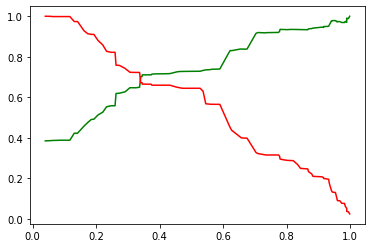

In [222]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making Predictions on the test set

In [223]:
scaler = StandardScaler()

X_train[['TotalVisits']] = scaler.fit_transform(X_train[['TotalVisits']])
X_train.head()


,TotalVisits,Page Views Per Visit,Origin_Landing Page Submission,Origin_Others,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Others,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent,Mumbai,Other Cities
3009,-0.417238,2.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1012,-0.417238,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0
9226,-1.034493,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4750,-0.417238,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
7987,0.508645,2.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [224]:
X_test = X_test[col]
X_test.head()

,Origin_Landing Page Submission,Origin_Others,Source_Google,Specialization_Other,Unemployed,Working Professional,Last Activity_Modified,Last Activity_Other,Last Activity_SMS Sent
3271,0,0,1,1,1,0,0,0,0
1490,1,0,0,0,0,1,0,0,0
7936,0,0,1,1,1,0,0,0,0
4216,0,1,0,0,0,0,1,0,0
3830,1,0,0,0,1,0,0,0,0


In [225]:
X_test_sm = sm.add_constant(X_test)

In [226]:
y_test_pred = res.predict(X_test_sm)

In [227]:
y_test_pred[:10]

3271    0.290949
1490    0.834630
7936    0.290949
4216    0.917089
3830    0.259959
1800    0.879639
6507    0.675673
4821    0.259959
4223    0.934836
4714    0.117726
dtype: float64

In [228]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [229]:
# Let's see the head
y_pred_1.head()

,0
3271,0.290949
1490,0.834630
7936,0.290949
4216,0.917089
3830,0.259959


In [230]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [231]:
# Putting LeadID to index
y_test_df['Lead ID'] = y_test_df.index

In [232]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [233]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [234]:
y_pred_final.head()

,Converted,Lead ID,0
0,0,3271,0.290949
1,1,1490,0.834630
2,0,7936,0.290949
3,1,4216,0.917089
4,0,3830,0.259959


In [235]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [236]:
# Rearranging the columns
y_pred_final = y_pred_final[['Lead ID','Converted','Converted_Prob']]

In [237]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob
0,3271,0,0.290949
1,1490,1,0.834630
2,7936,0,0.290949
3,4216,1,0.917089
4,3830,0,0.259959


In [238]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [239]:
y_pred_final.head()

,Lead ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.290949,1
1,1490,1,0.834630,1
2,7936,0,0.290949,1
3,4216,1,0.917089,1
4,3830,0,0.259959,0


In [240]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7271391847227323

In [241]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1275,  459],
       [ 284,  705]])

In [242]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [243]:
# Let us calculate specificity
TN / float(TN+FP)

0.7352941176470589

In [244]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7128412537917088

In [245]:
y_pred_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2723 entries, 0 to 2722
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Lead ID          2723 non-null   int64  
 1   Converted        2723 non-null   int64  
 2   Converted_Prob   2723 non-null   float64
 3   final_predicted  2723 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 85.2 KB


## Generating the Score for Leads

In [ ]:
leads_final.info()

In [ ]:
leads_final.head()

In [ ]:
# Converting the index column to Lead ID
leads_final['Lead ID'] = leads_final.index

In [ ]:
leads_final.head()

In [ ]:
# Bringing the Lead ID column to begining
columns = leads_final.columns.tolist()
columns = columns[-1:] + columns[:-1]
leads_final = leads_final[columns]
leads_final.head()

In [ ]:
leads_final.info()

**We can say the Probability calculated on the Converted variable can be the Score.**
> The Leads that have a probability of higher than 75% can be targeted by the Sales Team.

In [ ]:
# Merging the Probabilities in Train and Test Data.
y_train_pred_final.head()

Now we need to extract 'Lead ID' and 'Converted_Prob' from both the y_test_pred_final and y_pred_final

In [ ]:
train_prob = y_train_pred_final[['Lead ID','Converted_Prob']].copy()
train_prob.head()

In [ ]:
test_prob = y_pred_final[['Lead ID','Converted_Prob']].copy()
test_prob.head()

Merging the two files

In [ ]:
score = pd.concat([test_prob,train_prob],axis=0)
score.head()

In [ ]:
score.shape

In [ ]:
# Creating a new column as 'Score'.
score['Lead Score'] = round(score['Converted_Prob']*100,2)

In [ ]:
score.head()

> Now, we will create a new column named 'Hot Lead' to indicate whether the lead is a Hot Lead or Not based on the 'Score' variable.

In [ ]:
# Creating the column 'Hot Lead'
score['Hot Lead'] = 0
score.loc[score['Lead Score'] > 70, 'Hot Lead'] = 1

In [ ]:
score.head()

In [ ]:
score.sort_values(['Lead Score'], ascending = False)

### Merging the 'Score' dataframe to the original dataset

In [ ]:
leads_final = pd.merge(leads_final, score, on='Lead ID')

In [ ]:
leads_final.head()

In [ ]:
leads_final = leads_final.sort_values(['Lead Score'], ascending=False)

In [ ]:
leads_final

In [ ]:
Hot_leads = leads_final[leads_final['Hot Lead']==1].copy()

In [ ]:
Hot_leads

In [ ]:
Hot_leads = Hot_leads.drop(['Lead ID'], axis = 1)

In [ ]:
Hot_leads

#### We can see that, after performing Logistic Regression, we have 1055 leads, that have high chances of converting.

In [ ]:
## Conversion Rate
converted = (sum(Hot_leads['Converted'])/len(Hot_leads['Converted'].index))*100
converted